In [36]:
# dataset={"csv_path":"../datasets/heat_map_full.csv","description":"Whole DataSet"}
# dataset={"csv_path":"./heat_map_train.csv","description":"4 Subsets (colab)"}
dataset={"csv_path":"../datasets/heat_map_full.csv","description":"4 Subsets (colab)"}

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [45]:
def plot_histogram(df,dataset_description):
    zeros=[]
    nulls=[]
    ones=[]
    negative=[]

    for column in df.columns:
        zeros.append((df[column]==0).sum())
        nulls.append( df[column].isnull().sum())
        ones.append((df[column]==1).sum())
        negative.append((df[column]==-1).sum())


    # make a histogram of the number of ones and zeros in each column
    fig, ax = plt.subplots(figsize=(12, 8))
    index = np.arange(len(df.columns))
    bar_width = 0.15
    opacity = 0.8
    plt.bar(index, ones, bar_width, alpha=opacity, color='b', label='ones')
    plt.bar(index + bar_width, zeros, bar_width, alpha=opacity, color='r', label='zeros')
    plt.bar(index + 2*bar_width, nulls, bar_width, alpha=opacity, color='g', label='nulls')
    plt.bar(index + 3*bar_width, negative, bar_width, alpha=opacity, color='y', label='negative')

    plt.xlabel('Columns')
    plt.ylabel('Frequency')
    plt.title('Frequency of Labels per class (' + dataset_description+')')
    plt.xticks(index + bar_width, df.columns, rotation='vertical')
    plt.legend()
    plt.show()

In [47]:
# Read CSV File
df = pd.read_csv(dataset["csv_path"])

# remove the first two columns
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)

# remove the last column
df = df.drop(df.columns[-1], axis=1)
df = df.drop(df.columns[-1], axis=1)

df=df.drop(columns=["Consolidation","Enlarged Cardiomediastinum","Fracture","Lung Lesion","Pleural Other","Pneumothorax"])

# Print column names with index
for i, col in enumerate(df.columns):
    print(f"Column {i}: {col}")

df.head()



Column 0: Atelectasis
Column 1: Cardiomegaly
Column 2: Edema
Column 3: Lung Opacity
Column 4: No Finding
Column 5: Pleural Effusion
Column 6: Pneumonia
Column 7: Support Devices


,Atelectasis,Cardiomegaly,Edema,Lung Opacity,No Finding,Pleural Effusion,Pneumonia,Support Devices
0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,-1.0,NaN
4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


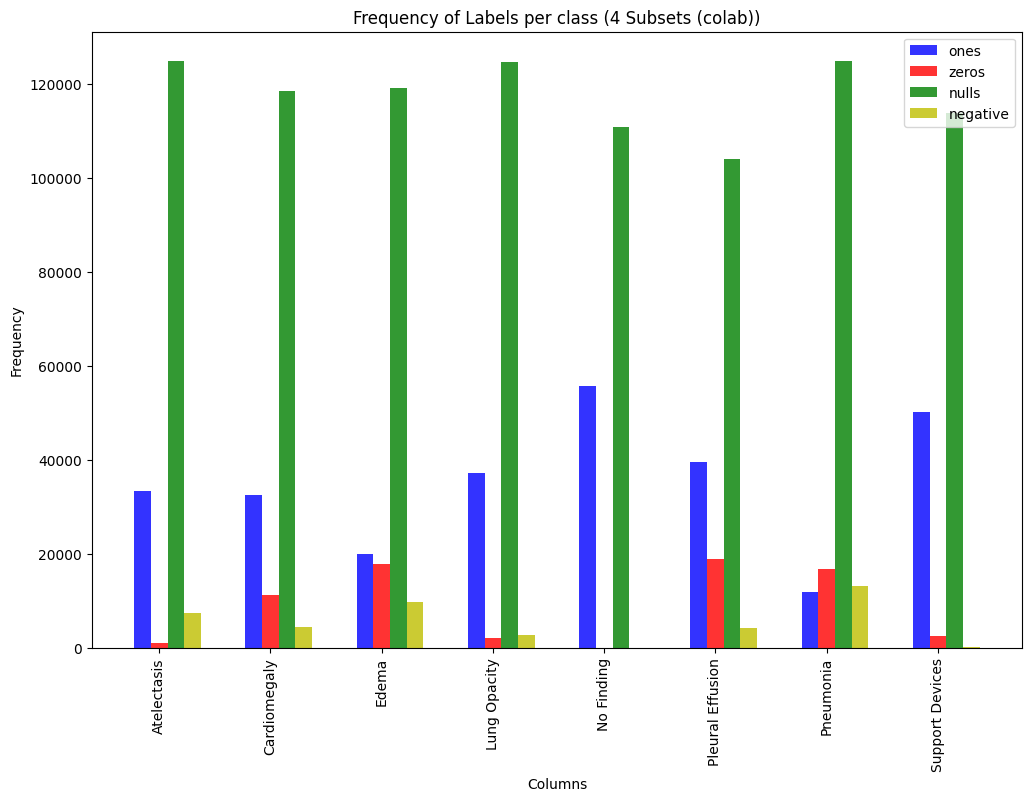

In [48]:
plot_histogram(df=df,dataset_description=dataset['description'])


### Drop Rows with high nulls

In [39]:
threshs = np.arange(1,15,1)
print(len(df.columns))
for thresh in threshs:
    # Drop rows with more than 7 NaN values
    # thresh=len(df.columns) - 7
    # Drop rows with high number of missing values
    df_drop_nan = df.dropna(thresh=14-thresh)

    # plot_histogram(df=df_drop_nan,dataset_description=dataset['description']+ f" (Drop Examples) with more than {thresh} NAN per row" )
    
    # Print the number of rows dropped and remaining
    print(f"Threshold: {thresh}")
    # No of rows dropped
    print(f"Number of rows dropped: {len(df) - len(df_drop_nan)}")
    # no of rows remaining
    print(f"Number of rows remaining: {len(df_drop_nan)}")
threshs = np.arange(1,15,1)
print(len(df.columns))
for thresh in threshs:
    # Drop rows with more than 7 NaN values
    # thresh=len(df.columns) - 7
    # Drop rows with high number of missing values
    df_drop_nan = df.dropna(thresh=14-thresh)

    # plot_histogram(df=df_drop_nan,dataset_description=dataset['description']+ f" (Drop Examples) with more than {thresh} NAN per row" )
    
    # Print the number of rows dropped and remaining
    print(f"Threshold: {thresh}")
    # No of rows dropped
    print(f"Number of rows dropped: {len(df) - len(df_drop_nan)}")
    # no of rows remaining
    print(f"Number of rows remaining: {len(df_drop_nan)}")
threshs = np.arange(1,15,1)
print(len(df.columns))
for thresh in threshs:
    # Drop rows with more than 7 NaN values
    # thresh=len(df.columns) - 7
    # Drop rows with high number of missing values
    df_drop_nan = df.dropna(thresh=14-thresh)

    # plot_histogram(df=df_drop_nan,dataset_description=dataset['description']+ f" (Drop Examples) with more than {thresh} NAN per row" )
    
    # Print the number of rows dropped and remaining
    print(f"Threshold: {thresh}")
    # No of rows dropped
    print(f"Number of rows dropped: {len(df) - len(df_drop_nan)}")
    # no of rows remaining
    print(f"Number of rows remaining: {len(df_drop_nan)}")

14
Threshold: 1
Number of rows dropped: 166496
Number of rows remaining: 0
Threshold: 2
Number of rows dropped: 166496
Number of rows remaining: 0
Threshold: 3
Number of rows dropped: 166496
Number of rows remaining: 0
Threshold: 4
Number of rows dropped: 166470
Number of rows remaining: 26
Threshold: 5
Number of rows dropped: 166239
Number of rows remaining: 257
Threshold: 6
Number of rows dropped: 164919
Number of rows remaining: 1577
Threshold: 7
Number of rows dropped: 160681
Number of rows remaining: 5815
Threshold: 8
Number of rows dropped: 150078
Number of rows remaining: 16418
Threshold: 9
Number of rows dropped: 130920
Number of rows remaining: 35576
Threshold: 10
Number of rows dropped: 108653
Number of rows remaining: 57843
Threshold: 11
Number of rows dropped: 85206
Number of rows remaining: 81290
Threshold: 12
Number of rows dropped: 53507
Number of rows remaining: 112989
Threshold: 13
Number of rows dropped: 1811
Number of rows remaining: 164685
Threshold: 14
Number of ro

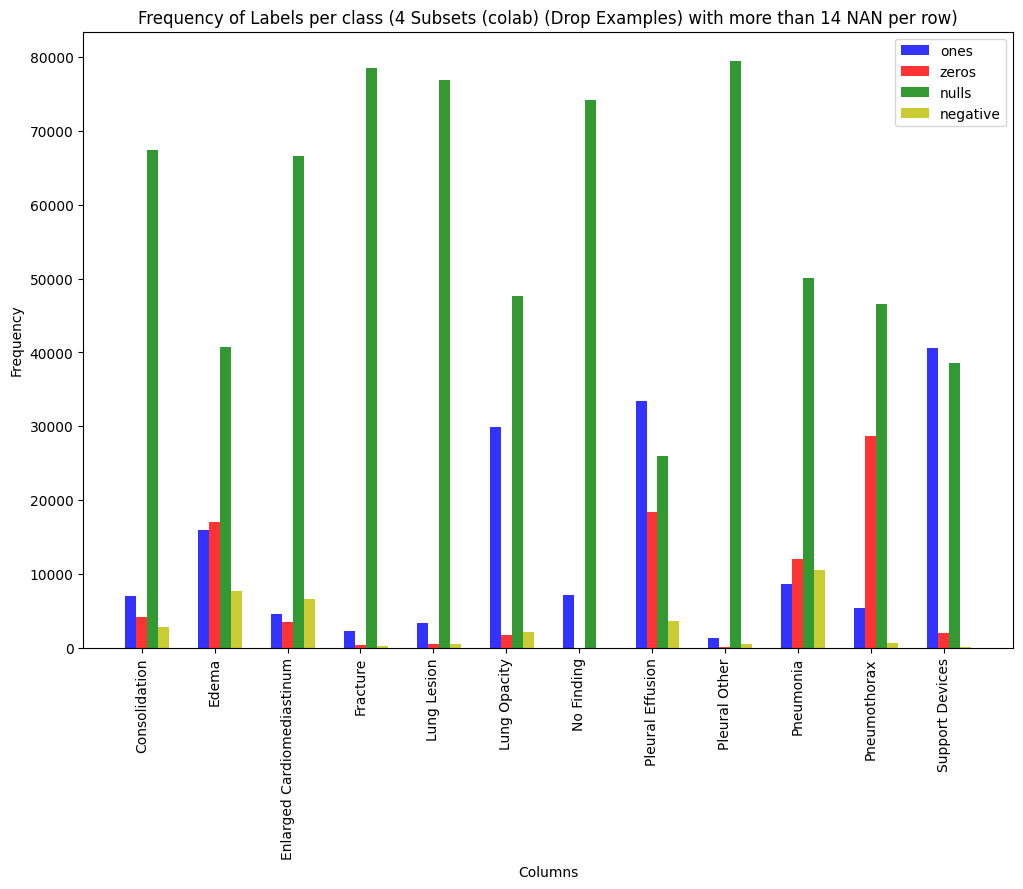

Threshold: 11
Number of rows dropped: 85206
Number of rows remaining: 81290


In [40]:

# Drop rows with more than 7 NaN values
# thresh=len(df.columns) - 7
# Drop rows with high number of missing values
df_drop_nan = df.dropna(thresh=14-11)

plot_histogram(df=df_drop_nan,dataset_description=dataset['description']+ f" (Drop Examples) with more than {thresh} NAN per row" )

# Print the number of rows dropped and remaining
print(f"Threshold: {11}")
# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_drop_nan)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_drop_nan)}")

### Drop Rows with high zeros

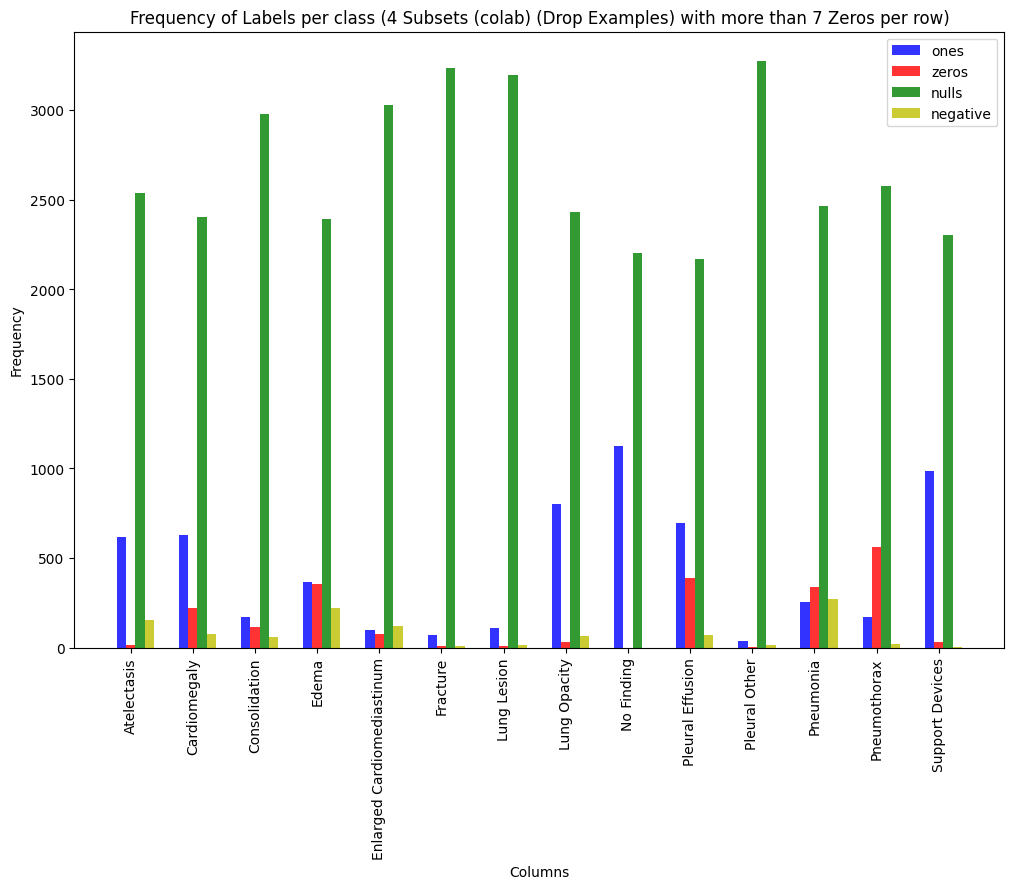

Number of rows dropped: 0
Number of rows remaining: 3328


In [6]:
# Drop rows with more than 7 Zeros values
thresh=7
# Drop rows with high number zeros
df_drop_zeros = df[(df==0.0).sum(axis=1)<thresh]

plot_histogram(df=df_drop_zeros,dataset_description=dataset['description']+ f" (Drop Examples) with more than {thresh} Zeros per row" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_drop_zeros)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_drop_zeros)}")


### Drop Rows with -1

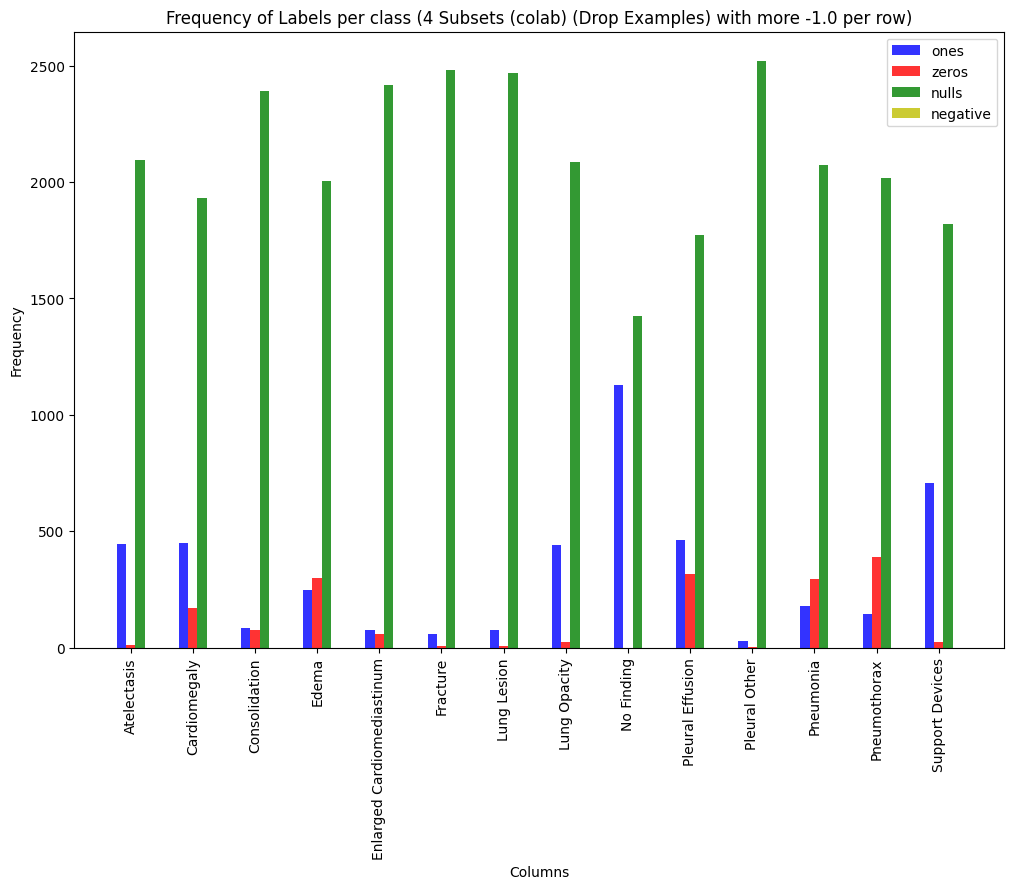

Number of rows dropped: 779
Number of rows remaining: 2549


In [7]:
# Drop rows with negative values
df_drop_negative = df[(df==-1.0).sum(axis=1)<1]

plot_histogram(df=df_drop_negative,dataset_description=dataset['description']+ f" (Drop Examples) with more -1.0 per row" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_drop_negative)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_drop_negative)}")


#### Merging Zeros& NAN

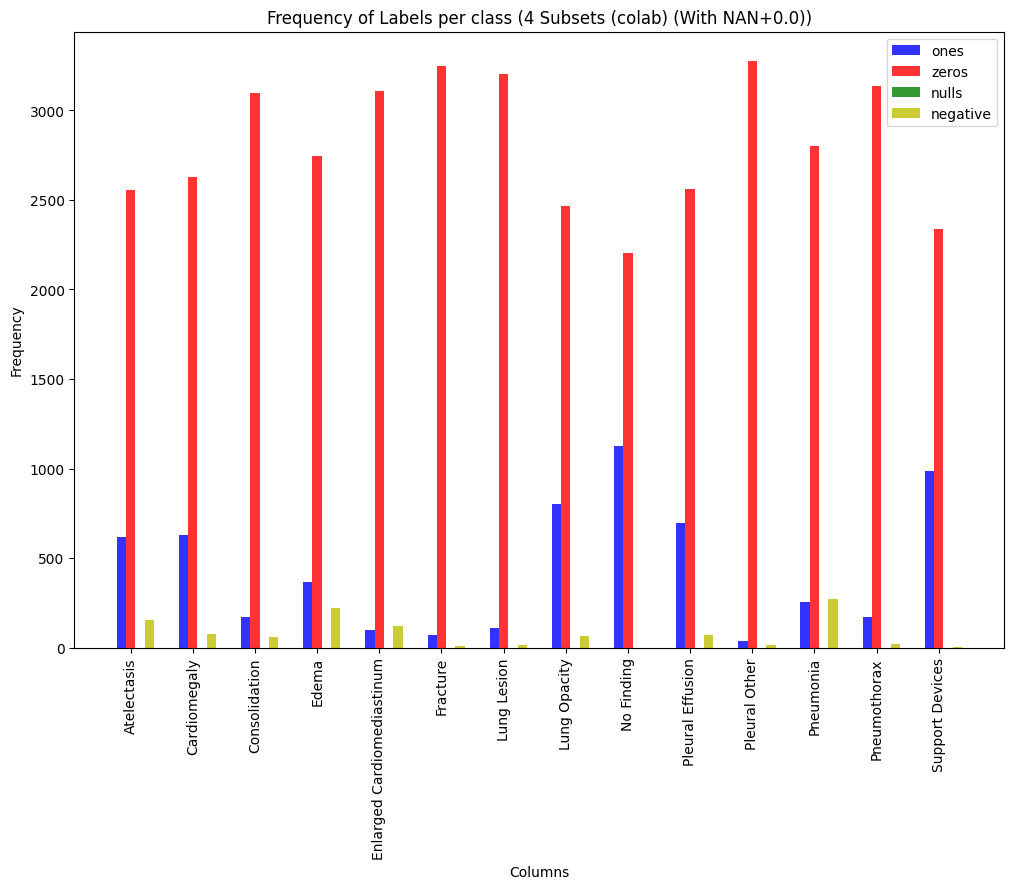

Number of rows dropped: 0
Number of rows remaining: 3328


In [8]:
# Create Deep Copy of the DataFrame
df_merged_zeros_nan = df.copy(deep=True)

# Replace NaN with 0.0
df_merged_zeros_nan.iloc[:, 2:16] = df.iloc[:, 2:16].replace(np.nan, 0.0)

plot_histogram(df=df_merged_zeros_nan,dataset_description=dataset['description']+ f" (With NAN+0.0)" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_merged_zeros_nan)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_merged_zeros_nan)}")

#### Merging Ones & -1

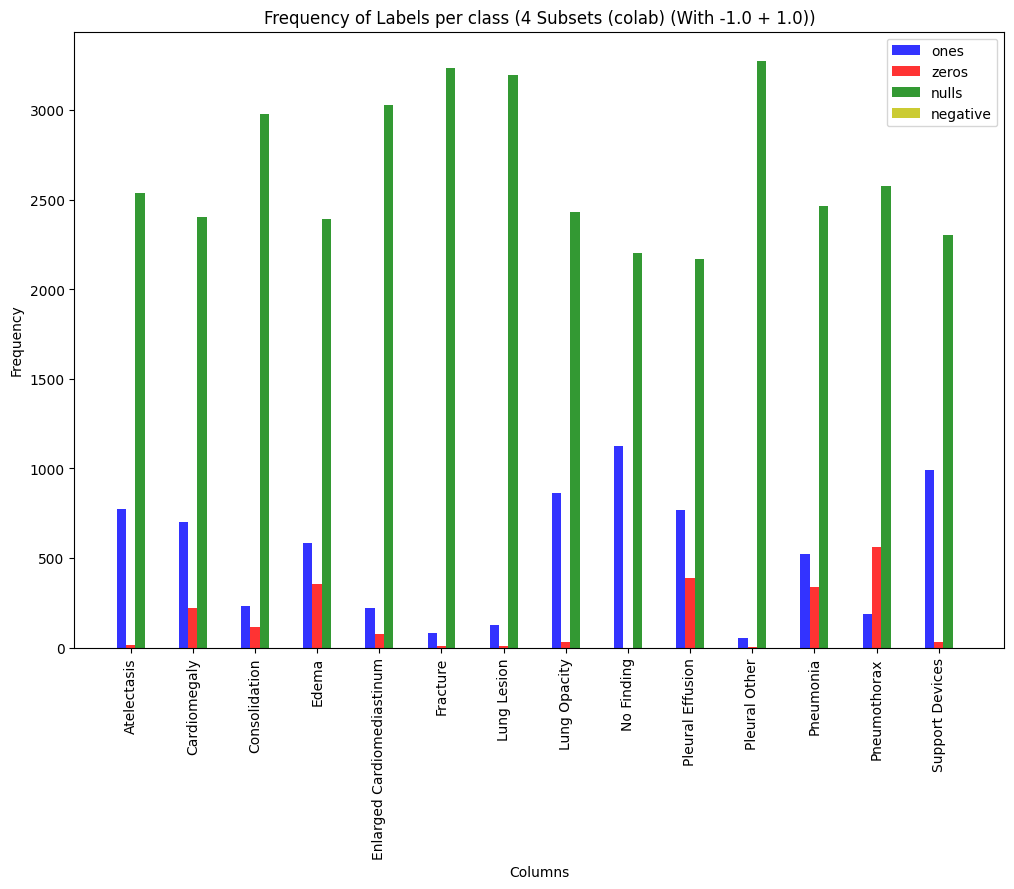

Number of rows dropped: 0
Number of rows remaining: 3328


In [11]:
# Create Deep Copy of the DataFrame
df_merged_ones_neg = df.copy(deep=True)

# Replace NaN with 0.0
df_merged_ones_neg.iloc[:, 2:16] = df.iloc[:, 2:16].replace(-1.0, 1.0)

plot_histogram(df=df_merged_ones_neg,dataset_description=dataset['description']+ f" (With -1.0 + 1.0)" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_merged_ones_neg)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_merged_ones_neg)}")

#### Merging Ones+-1 && Zeroes+NAN 


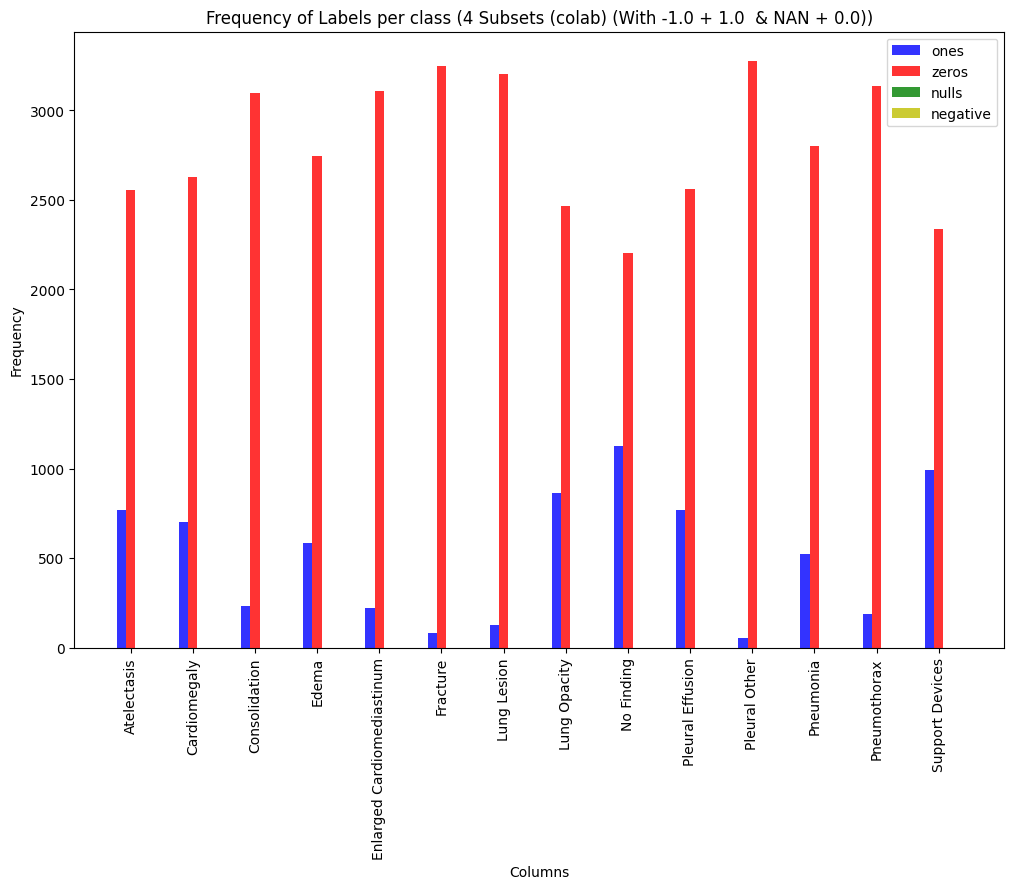

Number of rows dropped: 0
Number of rows remaining: 3328


In [12]:
# Create Deep Copy of the DataFrame
df_merged_ones__neg_nan_zeros = df.copy(deep=True)

# Replace NaN with 0.0
df_merged_ones__neg_nan_zeros.iloc[:, 2:16] = df.iloc[:, 2:16].replace(-1.0, 1.0)
df_merged_ones__neg_nan_zeros.iloc[:, 2:16] = df_merged_ones__neg_nan_zeros.iloc[:, 2:16].replace(np.nan, 0.0)

plot_histogram(df=df_merged_ones__neg_nan_zeros,dataset_description=dataset['description']+ f" (With -1.0 + 1.0  & NAN + 0.0)" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_merged_ones__neg_nan_zeros)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_merged_ones__neg_nan_zeros)}")

### Merge + Drop Rows with high zeros

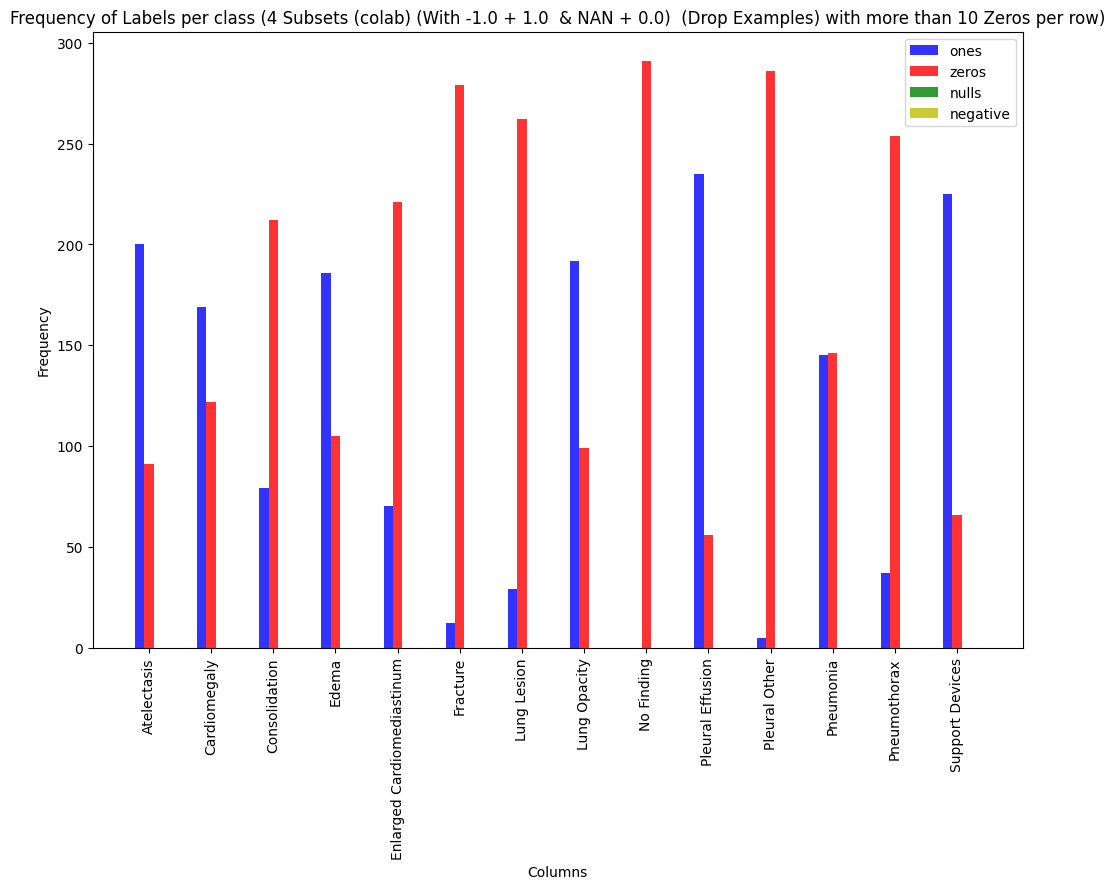

Number of rows dropped: 3037
Number of rows remaining: 291


In [10]:
# Create Deep Copy of the DataFrame
df_merged_ones_neg_nan_zeros = df.copy(deep=True)

# Replace NaN with 0.0
df_merged_ones_neg_nan_zeros.iloc[:, 2:16] = df.iloc[:, 2:16].replace(-1.0, 1.0)
df_merged_ones_neg_nan_zeros.iloc[:, 2:16] = df_merged_ones_neg_nan_zeros.iloc[:, 2:16].replace(np.nan, 0.0)


# Drop rows with more than 7 Zeros values
thresh=10
# Drop rows with high number zeros
df_merged_ones_neg_nan_zeros = df_merged_ones_neg_nan_zeros[(df_merged_ones_neg_nan_zeros==0.0).sum(axis=1)<thresh]

plot_histogram(df=df_merged_ones_neg_nan_zeros,dataset_description=dataset['description']+ f" (With -1.0 + 1.0  & NAN + 0.0)  (Drop Examples) with more than {thresh} Zeros per row" )

# No of rows dropped
print(f"Number of rows dropped: {len(df) - len(df_merged_ones_neg_nan_zeros)}")
# no of rows remaining
print(f"Number of rows remaining: {len(df_merged_ones_neg_nan_zeros)}")

## Ratios

In [11]:
df_final=df_merged_ones_neg_nan_zeros
zeros=[]
nulls=[]
ones=[]
negative=[]

for column in df_final.columns[2:16]:
    zeros.append((df_final[column]==0).sum())
    nulls.append( df_final[column].isnull().sum())
    ones.append((df_final[column]==1).sum())
    negative.append((df_final[column]==-1).sum())

d:\anaconda3\envs\pt\Lib\site-packages\matplotlib\transforms.py:354: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]
posx and posy should be finite values
posx and posy should be finite values


Ratio of Zeros to Ones:
{'Atelectasis': 0.455, 'Cardiomegaly': 0.7218934911242604, 'Consolidation': 2.6835443037974684, 'Edema': 0.5645161290322581, 'Enlarged Cardiomediastinum': 3.157142857142857, 'Fracture': 23.25, 'Lung Lesion': 9.03448275862069, 'Lung Opacity': 0.515625, 'No Finding': inf, 'Pleural Effusion': 0.23829787234042554, 'Pleural Other': 57.2, 'Pneumonia': 1.006896551724138, 'Pneumothorax': 6.864864864864865, 'Support Devices': 0.29333333333333333}

Ratio of Zeros and NaNs to Ones and Negative Ones:
{'Atelectasis': 0.455, 'Cardiomegaly': 0.7218934911242604, 'Consolidation': 2.6835443037974684, 'Edema': 0.5645161290322581, 'Enlarged Cardiomediastinum': 3.157142857142857, 'Fracture': 23.25, 'Lung Lesion': 9.03448275862069, 'Lung Opacity': 0.515625, 'No Finding': inf, 'Pleural Effusion': 0.23829787234042554, 'Pleural Other': 57.2, 'Pneumonia': 1.006896551724138, 'Pneumothorax': 6.864864864864865, 'Support Devices': 0.29333333333333333}


posx and posy should be finite values
posx and posy should be finite values


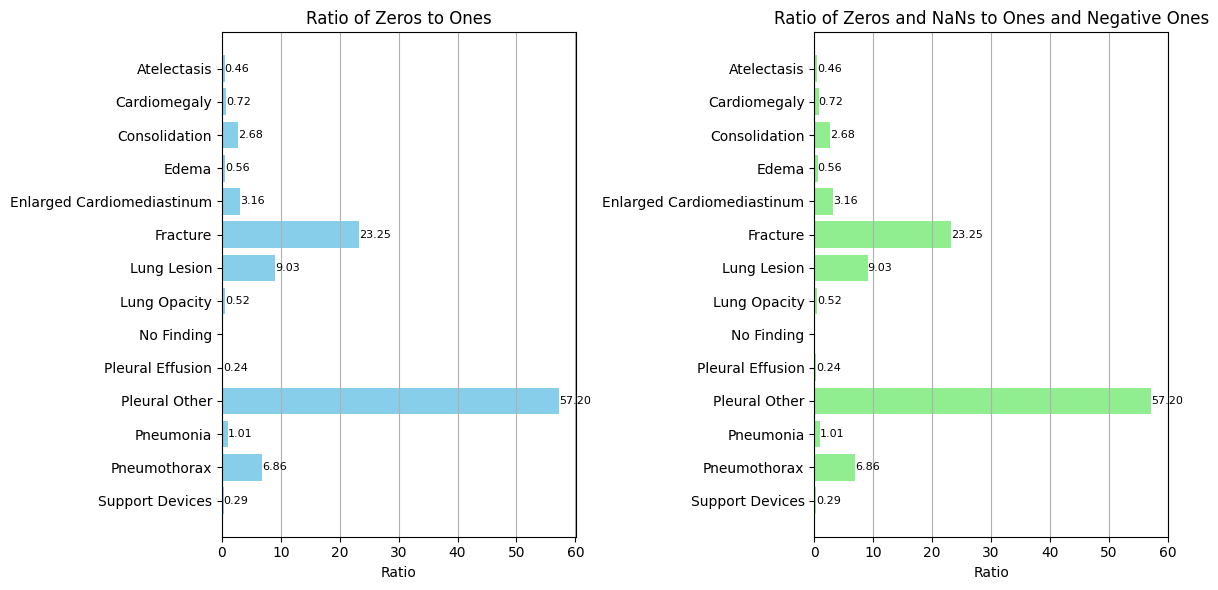

In [12]:
# Calculate ratio of zeros to ones
zero_to_one_ratios = {column: zeros[i] / ones[i] if ones[i] != 0 else float('inf') for i, column in enumerate(df.columns[2:16])}

# Calculate ratio of zeros and NaNs to counts of ones and negative ones
zero_nan_to_one_negative_ratios = {column: (zeros[i] + nulls[i]) / (ones[i] + negative[i]) if ones[i] + negative[i] != 0 else float('inf') for i, column in enumerate(df.columns[2:16])}

# Print ratios
print("Ratio of Zeros to Ones:")
print(zero_to_one_ratios)
print("\nRatio of Zeros and NaNs to Ones and Negative Ones:")
print(zero_nan_to_one_negative_ratios)



import matplotlib.pyplot as plt

# Extract column names and ratios
columns = list(zero_to_one_ratios.keys())
zero_to_one_values = list(zero_to_one_ratios.values())
zero_nan_to_one_negative_values = list(zero_nan_to_one_negative_ratios.values())

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot Ratio of Zeros to Ones
bars1=ax1.barh(columns, zero_to_one_values, color='skyblue')
ax1.set_title('Ratio of Zeros to Ones')
ax1.set_xlabel('Ratio')
ax1.invert_yaxis()  # Invert y-axis to match the order of columns
ax1.grid(axis='x')  # Add gridlines for better readability

# Plot Ratio of Zeros and NaNs to Ones and Negative Ones
bars2=ax2.barh(columns, zero_nan_to_one_negative_values, color='lightgreen')
ax2.set_title('Ratio of Zeros and NaNs to Ones and Negative Ones')
ax2.set_xlabel('Ratio')
ax2.invert_yaxis()  # Invert y-axis to match the order of columns
ax2.grid(axis='x')  # Add gridlines for better readability

# Add text annotations to the bars
for bar in bars1:
    width = bar.get_width()
    ax1.text(width, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(width),
             va='center', ha='left', fontsize=8, color='black')

for bar in bars2:
    width = bar.get_width()
    ax2.text(width, bar.get_y() + bar.get_height() / 2, '{:.2f}'.format(width),
             va='center', ha='left', fontsize=8, color='black')
    
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
